## 1. Import des bibliothèques

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from datetime import datetime

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Affichage complet des colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## 2. Chargement et concaténation des datasets

In [120]:
# Chemins des fichiers
data_dir = '../Data/row/'
files = [
    'automobile_tn_occasion_20251129_161105.csv',
    'automobile_tn_occasion_20251129_215715.csv',
    'automobile_tn_occasion_20251130_115220.csv'
]

# Charger tous les fichiers
dfs = []
for file in files:
    filepath = os.path.join(data_dir, file)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        print(f"✓ Chargé: {file} - {len(df)} lignes")
        dfs.append(df)
    else:
        print(f"⚠️ Fichier non trouvé: {file}")

# Concaténer tous les datasets
df_raw = pd.concat(dfs, ignore_index=True)

print(f"\n{'='*60}")
print(f"Total après concaténation: {len(df_raw)} voitures")
print(f"{'='*60}")

✓ Chargé: automobile_tn_occasion_20251129_161105.csv - 1079 lignes
✓ Chargé: automobile_tn_occasion_20251129_215715.csv - 24 lignes
✓ Chargé: automobile_tn_occasion_20251130_115220.csv - 12 lignes

Total après concaténation: 1115 voitures


In [121]:
df_raw['Mise en circulation'].isna().sum()

1

In [122]:
# Afficher un aperçu des données brutes
print("Aperçu des données brutes:")
df_raw.head(10)

Aperçu des données brutes:


,URL,Modèle,Description,Prix,Kilométrage,Mise en circulation,Énergie,Boîte de vitesse,Puissance fiscale,Transmission,Carrosserie,État général,Anciens propriétaires,Date annonce
0,https://www.automobile.tn/fr/occasion/peugeot/...,Peugeot 208 Style,Affaire 1.2 PureTech 12V S&S 75 cv,37 500 DT,69 000 KM,7.2022,Essence,Manuelle,5 CV,Traction,Citadine,Très bon,1ère main,29.11.2025
1,https://www.automobile.tn/fr/occasion/seat/ibi...,Seat Ibiza Populaire,1.0 i 12V 75 cv,42 500 DT,100 000 KM,11.2019,Essence,Manuelle,4 CV,Traction,Citadine,Très bon,1ère main,29.11.2025
2,https://www.automobile.tn/fr/occasion/mercedes...,Mercedes-Benz Classe A AMG,180 1.3 Ti 16V 7G-DCT 136 cv Boîte auto,102 000 DT,110 000 KM,6.2019,Essence,Automatique,7 CV,Traction,Compacte,Très bon,1ère main,29.11.2025
3,https://www.automobile.tn/fr/occasion/land-rov...,Land Rover Range Rover Evoque Dynamic SE +,P300e 1.5 Si4 12V 309 PHEV AWD BVA8 200 cv Boî...,159 000 DT,110 000 KM,9.2021,Hybride rechargeable essence,Automatique,11 CV,Intégrale,SUV,Très bon,1ère main,29.11.2025
4,https://www.automobile.tn/fr/occasion/mercedes...,Mercedes-Benz CLA AMG,180 1.3 i 16V GPF 7G-DCT 136 cv Boîte auto,127 000 DT,85 000 KM,7.2021,Essence,Automatique,7 CV,Traction,Berline,Très bon,1ère main,29.11.2025
5,https://www.automobile.tn/fr/occasion/mercedes...,Mercedes-Benz CLA AMG,250 e 1.3 i 16V GPF 218 PHEV 160 cv Boîte auto,140 000 DT,69 000 KM,1.2021,Hybride rechargeable essence,Automatique,8 CV,Traction,Berline,Très bon,1ère main,29.11.2025
6,https://www.automobile.tn/fr/occasion/bmw/seri...,BMW Série 4 Gran Coupé Luxury Line,418i 1.5 i 12V Steptronic8 136 cv Boîte auto,105 000 DT,79 000 KM,11.2019,Essence,Automatique,7 CV,Propulsion,Berline,Très bon,1ère main,29.11.2025
7,https://www.automobile.tn/fr/occasion/bmw/seri...,BMW Série 4 Gran Coupé Pack M Sport,NaN,117 000 DT,90 000 KM,6.2019,Essence,Automatique,7 CV,Traction,Berline,Très bon,1ère main,29.11.2025
8,https://www.automobile.tn/fr/occasion/land-rov...,Land Rover Range Rover Evoque R-Dynamic,2.0 TD4 16V DPF 4WD BVA9 180 cv Boîte auto,102 000 DT,160 000 KM,11.2016,Diesel,Automatique,10 CV,Propulsion,SUV,Très bon,2ème main,29.11.2025
9,https://www.automobile.tn/fr/occasion/mercedes...,Mercedes-Benz Classe C AMG,180 1.5 i 16V 9G-TRONIC 156 cv Boîte auto,142 200 DT,147 000 KM,8.2019,Essence,Automatique,8 CV,Propulsion,Berline,Très bon,1ère main,29.11.2025


In [123]:
# Informations sur le dataset
print("Informations sur le dataset:")
df_raw.info()

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   URL                    1115 non-null   object 
 1   Modèle                 1114 non-null   object 
 2   Description            901 non-null    object 
 3   Prix                   1114 non-null   object 
 4   Kilométrage            1114 non-null   object 
 5   Mise en circulation    1114 non-null   float64
 6   Énergie                1114 non-null   object 
 7   Boîte de vitesse       1114 non-null   object 
 8   Puissance fiscale      1114 non-null   object 
 9   Transmission           1114 non-null   object 
 10  Carrosserie            1114 non-null   object 
 11  État général           1090 non-null   object 
 12  Anciens propriétaires  1098 non-null   object 
 13  Date annonce           1114 non-null   object 
dtypes: float64(1), object(13)
m

## 3. Suppression des doublons

In [124]:
# Supprimer les doublons basés sur l'URL
print(f"Nombre de doublons (URL): {df_raw.duplicated(subset=['URL']).sum()}")
df = df_raw.drop_duplicates(subset=['URL'], keep='first')
print(f"Dataset après suppression des doublons: {len(df)} voitures")

# Réinitialiser l'index
df = df.reset_index(drop=True)

Nombre de doublons (URL): 27
Dataset après suppression des doublons: 1088 voitures


## 4. Nettoyage de la colonne 'Modèle' - Extraction de la marque

In [125]:
# Extraire la marque (premier mot du modèle)
def extract_brand(model_name):
    if pd.isna(model_name) or model_name == 'N/A':
        return 'Unknown'
    # Prendre le premier mot
    brand = str(model_name).split()[0]
    return brand.strip()

df['Marque'] = df['Modèle'].apply(extract_brand)

# Standardisation des noms de marques
def standardize_brand(brand):
    """
    Standardise les noms de marques selon des corrections spécifiques
    """
    corrections = {
        'Bmw': 'BMW',
        'Mg': 'MG',
        'Gwm': 'GWM',
        'Byd': 'BYD',
        'Ds': 'DS',
        'Volkswagen': 'VW',
        'Mercedes': 'Mercedes-Benz'
    }
    
    # Appliquer les corrections si la marque est dans le dictionnaire
    return corrections.get(brand, brand)

# Appliquer la standardisation
df['Marque'] = df['Marque'].apply(standardize_brand)

print("Distribution des marques (APRÈS STANDARDISATION):")
print(df['Marque'].value_counts())

Distribution des marques (APRÈS STANDARDISATION):
Marque
Mercedes-Benz    228
VW               107
KIA               87
BMW               78
Audi              63
Peugeot           57
Land              51
Hyundai           34
Toyota            31
Renault           29
GWM               25
Citroën           24
Nissan            22
Ford              21
Suzuki            20
Seat              19
Porsche           18
Jeep              15
MG                15
Skoda             13
Mazda             13
Chery             12
Dacia             12
Fiat              11
Jaguar             9
Ssangyong          6
Chevrolet          6
Mitsubishi         6
Mahindra           5
Opel               4
Geely              4
Mini               4
Honda              3
DS                 3
Isuzu              3
Volvo              3
Alfa               3
Cupra              3
DFSK               2
BYD                2
Dongfeng           2
Infiniti           2
Iveco              2
BAIC               1
Hummer             

## 5. Nettoyage de la colonne 'Prix'

In [126]:
# Fonction pour nettoyer le prix
def clean_price(price):
    if pd.isna(price) or price == 'N/A':
        return np.nan
    # Enlever 'DT', espaces, et convertir en nombre
    price_str = str(price).replace('DT', '').replace(' ', '').strip()
    try:
        return float(price_str)
    except:
        return np.nan

df['Prix_Numeric'] = df['Prix'].apply(clean_price)

print(f"Prix - Valeurs manquantes: {df['Prix_Numeric'].isna().sum()}")
print(f"Prix - Statistiques:")
print(df['Prix_Numeric'].describe())

Prix - Valeurs manquantes: 1
Prix - Statistiques:
count      1087.00000
mean     102516.49954
std       74663.49883
min       19900.00000
25%       52000.00000
50%       79000.00000
75%      127000.00000
max      570000.00000
Name: Prix_Numeric, dtype: float64


## 6. Nettoyage de la colonne 'Kilométrage'

In [127]:
# Fonction pour nettoyer le kilométrage
def clean_mileage(mileage):
    if pd.isna(mileage) or mileage == 'N/A':
        return np.nan
    # Enlever 'KM', 'km', espaces, et convertir en nombre
    mileage_str = str(mileage).upper().replace('KM', '').replace(' ', '').strip()
    try:
        return float(mileage_str)
    except:
        return np.nan

df['Kilométrage_Numeric'] = df['Kilométrage'].apply(clean_mileage)

print(f"Kilométrage - Valeurs manquantes: {df['Kilométrage_Numeric'].isna().sum()}")
print(f"Kilométrage - Statistiques:")
print(df['Kilométrage_Numeric'].describe())

Kilométrage - Valeurs manquantes: 1
Kilométrage - Statistiques:
count      1087.000000
mean     116907.408464
std       82236.680118
min           0.000000
25%       59000.000000
50%       99000.000000
75%      158000.000000
max      670800.000000
Name: Kilométrage_Numeric, dtype: float64


## 7. Nettoyage de 'Mise en circulation' - Extraction de l'année

In [128]:
# Corriger toutes les dates incomplètes : ajouter 0 à la fin si l'année a seulement 3 chiffres
def fix_incomplete_year(date_val):
    if pd.isna(date_val):
        return date_val
    
    date_str = str(date_val).strip()
    
    # Détecter le format X.YYY ou XX.YYY (1 ou 2 chiffres + point + exactement 3 chiffres)
    # Exemples: 4.201, 11.202, 7.202, 9.201 -> 4.2010, 11.2020, 7.2020, 9.2010
    match = re.match(r'^(\d{1,2})\.(\d{3})$', date_str)
    if match:
        month = match.group(1)
        incomplete_year = match.group(2)
        # Ajouter 0 à la fin de l'année
        return f"{month}.{incomplete_year}0"
    
    return date_val

df['Mise en circulation'] = df['Mise en circulation'].apply(fix_incomplete_year)

# Fonction pour extraire l'année
def extract_year(date_str):
    if pd.isna(date_str):
        return np.nan
    
    date_str = str(date_str).strip()
    
    # Cas 1: 'N/A' ou vide
    if date_str in ['N/A', '', 'nan']:
        return np.nan
    
    # Cas 2: Format MM.YYYY ou MM/YYYY (ex: 05.2021, 12/2020)
    match = re.search(r'(\d{2})[./](\d{4})', date_str)
    if match:
        year = int(match.group(2))
        if 1990 <= year <= 2025:
            return year
    
    # Cas 2b: Format M.YYYY (ex: 7.2020, 9.2021) - 1 seul chiffre pour le mois
    match = re.search(r'(\d{1})[./](\d{4})', date_str)
    if match:
        year = int(match.group(2))
        if 1990 <= year <= 2025:
            return year
    
    # Cas 3: Format YYYY.MM ou YYYY/MM (ex: 2021.05)
    match = re.search(r'(\d{4})[./](\d{2})', date_str)
    if match:
        year = int(match.group(1))
        if 1990 <= year <= 2025:
            return year
    
    # Cas 4: Année seule (ex: 2021)
    match = re.search(r'\b(\d{4})\b', date_str)
    if match:
        year = int(match.group(1))
        if 1990 <= year <= 2025:
            return year
    
    # Cas 5: Format avec tiret MM-YYYY ou YYYY-MM
    match = re.search(r'(\d{2})-(\d{4})', date_str)
    if match:
        year = int(match.group(2))
        if 1990 <= year <= 2025:
            return year
    
    match = re.search(r'(\d{4})-(\d{2})', date_str)
    if match:
        year = int(match.group(1))
        if 1990 <= year <= 2025:
            return year
    
    # Si aucun format ne correspond
    return np.nan

df['Année'] = df['Mise en circulation'].apply(extract_year)

print(f"Année - Valeurs manquantes: {df['Année'].isna().sum()}")
print(f"Pourcentage de valeurs extraites: {(1 - df['Année'].isna().sum() / len(df)) * 100:.2f}%")
print(f"\nDistribution des années:")
print(df['Année'].value_counts().sort_index())

Année - Valeurs manquantes: 1
Pourcentage de valeurs extraites: 99.91%

Distribution des années:
Année
1991.0      1
1993.0      1
1996.0      3
1999.0      1
2001.0      2
2002.0      1
2004.0      3
2005.0      3
2006.0      6
2007.0      6
2008.0     17
2009.0     16
2010.0     26
2011.0     18
2012.0     28
2013.0     33
2014.0     42
2015.0     40
2016.0     55
2017.0     68
2018.0     83
2019.0     90
2020.0    120
2021.0    167
2022.0    128
2023.0     67
2024.0     45
2025.0     17
Name: count, dtype: int64


In [129]:
# Vérifier les valeurs qui n'ont pas pu être extraites
failed_extractions = df[df['Année'].isna() & df['Mise en circulation'].notna()]
if len(failed_extractions) > 0:
    print(f"⚠️ {len(failed_extractions)} valeurs n'ont pas pu être extraites:")
    print("\nValeurs 'Mise en circulation' qui n'ont pas pu être converties en année:")
    print("="*80)
    unique_failed = failed_extractions[['Mise en circulation']].drop_duplicates()
    for idx, row in unique_failed.iterrows():
        print(f"  - '{row['Mise en circulation']}'")
    
    # Afficher quelques exemples complets
    print("\n" + "="*80)
    print("Exemples de lignes avec extraction échouée:")
    print(failed_extractions[['URL','Modèle', 'Mise en circulation', 'Prix']].head(10))
else:
    print("✓ Toutes les valeurs ont été extraites avec succès!")

✓ Toutes les valeurs ont été extraites avec succès!


## 8. Nettoyage de 'Puissance fiscale'

In [130]:
# Fonction pour nettoyer la puissance fiscale
def clean_power(power):
    if pd.isna(power) or power == 'N/A':
        return np.nan
    
    power_str = str(power).upper().strip()
    
    # Cas spécial: "plus de X CV" ou "plus de X" -> extraire X
    if 'PLUS DE' in power_str:
        match = re.search(r'PLUS\s+DE\s+(\d+)', power_str)
        if match:
            return float(match.group(1))
    
    # Cas général: enlever 'CV', 'cv', espaces
    power_str = power_str.replace('CV', '').replace(' ', '').strip()
    
    # Essayer d'extraire un nombre
    try:
        return float(power_str)
    except:
        # Si la conversion échoue, essayer d'extraire un nombre avec regex
        match = re.search(r'(\d+\.?\d*)', power_str)
        if match:
            return float(match.group(1))
        return np.nan

df['Puissance_Numeric'] = df['Puissance fiscale'].apply(clean_power)

print(f"Puissance - Valeurs manquantes: {df['Puissance_Numeric'].isna().sum()}")
print(f"\nDistribution de la puissance:")
print(df['Puissance_Numeric'].value_counts().sort_index())

Puissance - Valeurs manquantes: 1

Distribution de la puissance:
Puissance_Numeric
4.0      53
5.0     143
6.0     153
7.0     155
8.0     196
9.0      99
10.0     67
11.0     53
12.0     33
13.0      6
14.0      4
15.0     29
16.0     25
17.0     10
18.0      3
19.0     16
20.0      8
21.0     11
22.0      1
23.0      4
24.0      3
25.0      2
26.0      2
28.0      1
29.0      1
30.0      1
32.0      2
33.0      1
34.0      1
43.0      3
48.0      1
Name: count, dtype: int64


In [131]:
# Inspecter la ligne où Puissance fiscale est vraiment N/A ou manquante
missing_power = df[df['Puissance_Numeric'].isna()]
print(f"Total de lignes avec Puissance_Numeric manquante: {len(missing_power)}")
print("\nDétail des lignes avec puissance manquante:")
print("="*80)
print(missing_power[['Modèle', 'Puissance fiscale', 'Puissance_Numeric']].to_string())

# Vérifier si c'est une valeur N/A originale ou un problème de conversion
if len(missing_power) > 0:
    print("\n" + "="*80)
    print("Valeurs de 'Puissance fiscale' pour ces lignes:")
    for idx, row in missing_power.iterrows():
        print(f"  Index {idx}: '{row['Puissance fiscale']}' (type: {type(row['Puissance fiscale'])})")

Total de lignes avec Puissance_Numeric manquante: 1

Détail des lignes avec puissance manquante:
    Modèle Puissance fiscale  Puissance_Numeric
570    NaN               NaN                NaN

Valeurs de 'Puissance fiscale' pour ces lignes:
  Index 570: 'nan' (type: <class 'float'>)


## 9. Analyse des valeurs manquantes

In [132]:
# Colonnes importantes à analyser
important_cols = ['Marque', 'Prix_Numeric', 'Kilométrage_Numeric', 'Année', 
                  'Puissance_Numeric', 'Énergie', 'Boîte de vitesse', 'Carrosserie']

# Calculer les valeurs manquantes
missing_data = pd.DataFrame({
    'Colonne': important_cols,
    'Valeurs manquantes': [df[col].isna().sum() for col in important_cols],
    'Pourcentage': [df[col].isna().sum() / len(df) * 100 for col in important_cols]
})

missing_data = missing_data.sort_values('Pourcentage', ascending=False)
print("Analyse des valeurs manquantes:")
print(missing_data.to_string(index=False))

Analyse des valeurs manquantes:
            Colonne  Valeurs manquantes  Pourcentage
       Prix_Numeric                   1     0.091912
Kilométrage_Numeric                   1     0.091912
              Année                   1     0.091912
  Puissance_Numeric                   1     0.091912
            Énergie                   1     0.091912
   Boîte de vitesse                   1     0.091912
        Carrosserie                   1     0.091912
             Marque                   0     0.000000


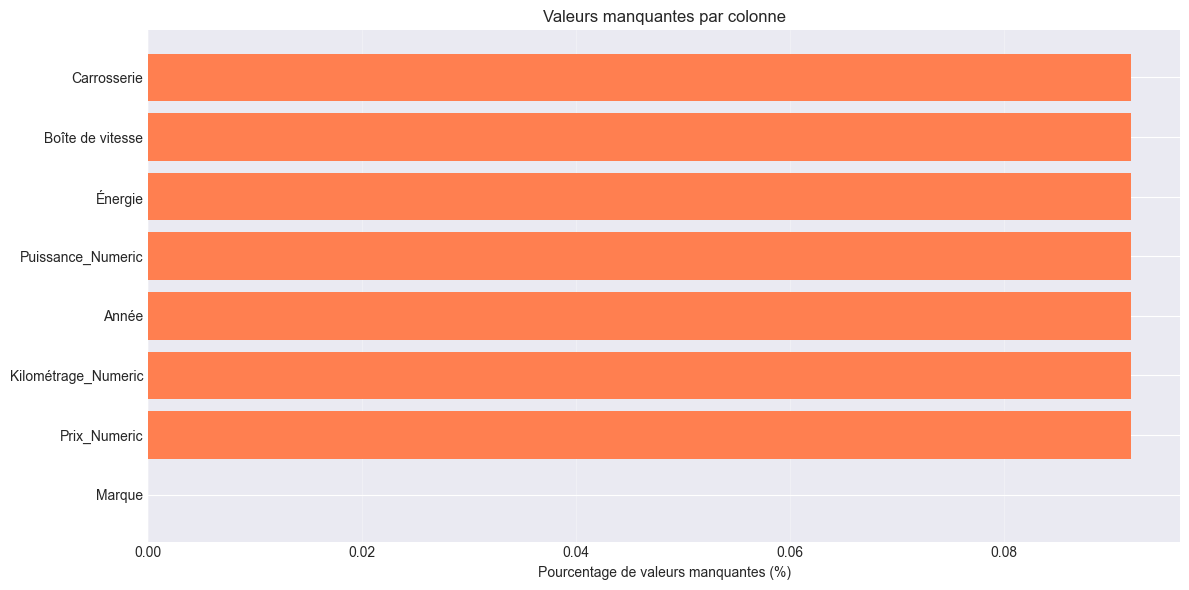

In [133]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
missing_data_sorted = missing_data.sort_values('Pourcentage')
plt.barh(missing_data_sorted['Colonne'], missing_data_sorted['Pourcentage'], color='coral')
plt.xlabel('Pourcentage de valeurs manquantes (%)')
plt.title('Valeurs manquantes par colonne')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Suppression des lignes sans prix

In [134]:
# Supprimer les lignes où le prix est manquant
print(f"Avant suppression: {len(df)} voitures")
df_clean = df.dropna(subset=['Prix_Numeric']).copy()
print(f"Après suppression (prix manquant): {len(df_clean)} voitures")
print(f"Voitures supprimées: {len(df) - len(df_clean)}")

Avant suppression: 1088 voitures
Après suppression (prix manquant): 1087 voitures
Voitures supprimées: 1


## 11. Visualisation des valeurs uniques - Variables catégorielles

In [135]:
# Énergie
print("=" * 60)
print("Distribution - Énergie:")
print("=" * 60)
print(df_clean['Énergie'].value_counts())
print(f"\nValeurs uniques: {df_clean['Énergie'].nunique()}")
print(f"Valeurs manquantes: {df_clean['Énergie'].isna().sum()}")

Distribution - Énergie:
Énergie
Essence                         704
Diesel                          239
Hybride rechargeable essence     73
Hybride léger essence            36
Electrique                       15
Hybride essence                   9
Hybride léger diesel              9
Hybride rechargeable diesel       2
Name: count, dtype: int64

Valeurs uniques: 8
Valeurs manquantes: 0


In [136]:
# Standardisation de la colonne 'Énergie'
def standardize_energie(energie):
    if pd.isna(energie):
        return 'Autre'
    
    energie_str = str(energie).lower().strip()
    
    # Essence (pur)
    if energie_str == 'essence':
        return 'Essence'
    
    # Diesel (pur)
    elif energie_str == 'diesel':
        return 'Diesel'
    
    # Électrique
    elif 'electrique' in energie_str or 'électrique' in energie_str:
        return 'Electrique'
    
    # Tous les hybrides (essence, diesel, rechargeable, léger)
    elif 'hybride' in energie_str:
        return 'Hybride'
    
    # Autres cas (GPL, Unknown, etc.)
    else:
        return 'Autre'

# Appliquer la standardisation
df_clean['Énergie'] = df_clean['Énergie'].apply(standardize_energie)

print("="*60)
print("Distribution - Énergie (APRÈS STANDARDISATION):")
print("="*60)
print(df_clean['Énergie'].value_counts())
print(f"\nValeurs uniques: {df_clean['Énergie'].nunique()}")
print(f"Valeurs manquantes: {df_clean['Énergie'].isna().sum()}")

Distribution - Énergie (APRÈS STANDARDISATION):
Énergie
Essence       704
Diesel        239
Hybride       129
Electrique     15
Name: count, dtype: int64

Valeurs uniques: 4
Valeurs manquantes: 0


In [137]:
# Boîte de vitesse
print("=" * 60)
print("Distribution - Boîte de vitesse:")
print("=" * 60)
print(df_clean['Boîte de vitesse'].value_counts())
print(f"\nValeurs uniques: {df_clean['Boîte de vitesse'].nunique()}")
print(f"Valeurs manquantes: {df_clean['Boîte de vitesse'].isna().sum()}")

Distribution - Boîte de vitesse:
Boîte de vitesse
Automatique    719
Manuelle       368
Name: count, dtype: int64

Valeurs uniques: 2
Valeurs manquantes: 0


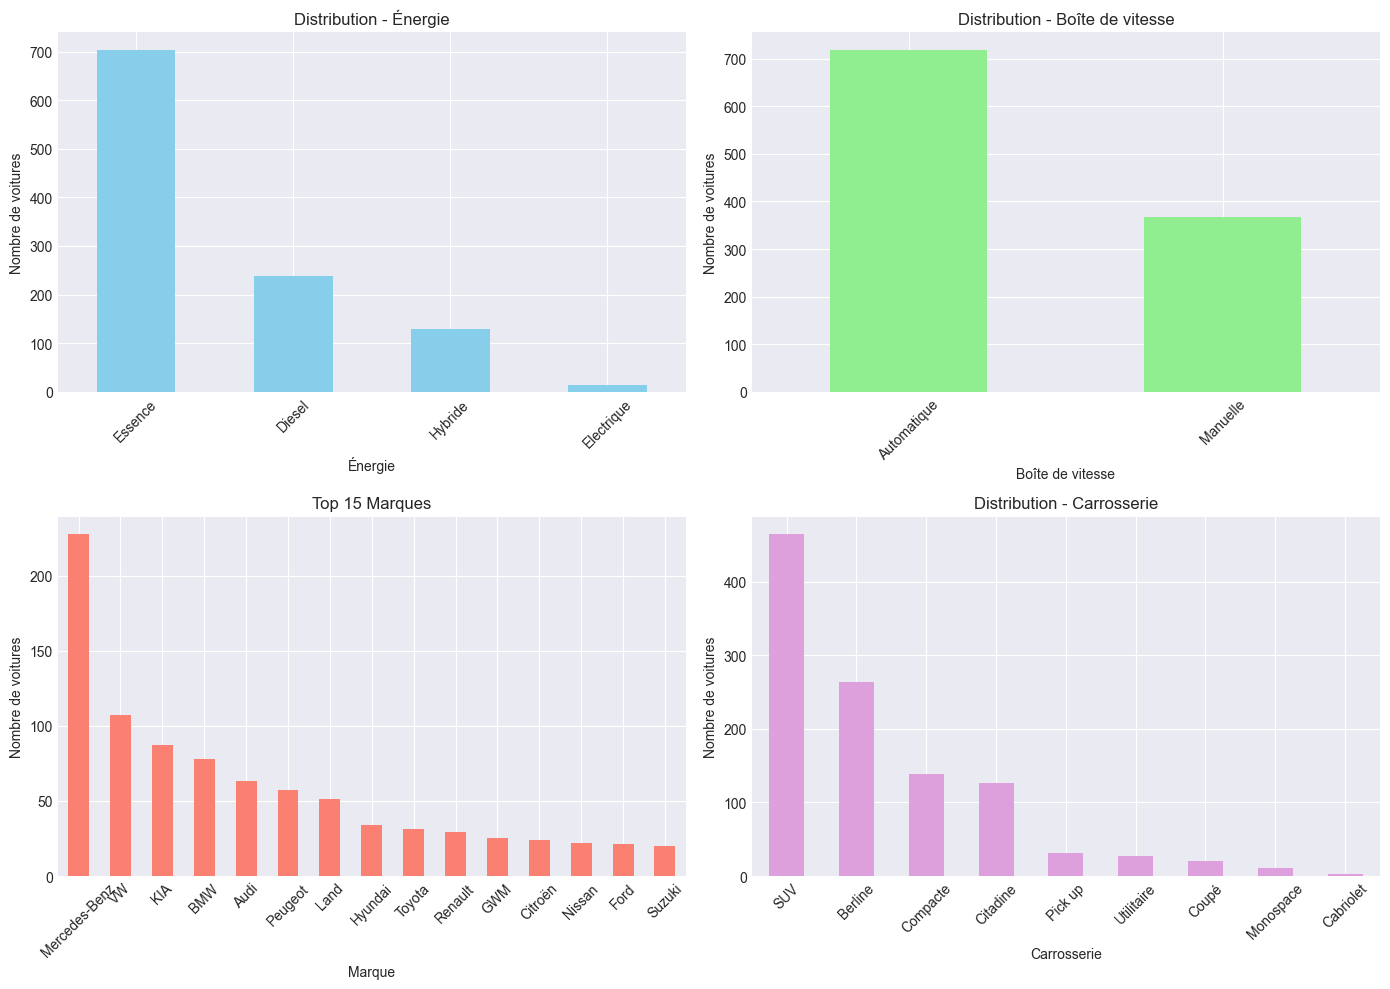

In [138]:
# Visualisation graphique
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Énergie
df_clean['Énergie'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution - Énergie')
axes[0, 0].set_ylabel('Nombre de voitures')
axes[0, 0].tick_params(axis='x', rotation=45)

# Boîte de vitesse
df_clean['Boîte de vitesse'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution - Boîte de vitesse')
axes[0, 1].set_ylabel('Nombre de voitures')
axes[0, 1].tick_params(axis='x', rotation=45)

# Marque (top 15)
df_clean['Marque'].value_counts().head(15).plot(kind='bar', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Top 15 Marques')
axes[1, 0].set_ylabel('Nombre de voitures')
axes[1, 0].tick_params(axis='x', rotation=45)

# Carrosserie
df_clean['Carrosserie'].value_counts().plot(kind='bar', ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Distribution - Carrosserie')
axes[1, 1].set_ylabel('Nombre de voitures')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 12. Imputation des valeurs manquantes

In [139]:
# Imputation du kilométrage par la médiane groupée par marque
df_clean['Kilométrage_Numeric'] = df_clean.groupby('Marque')['Kilométrage_Numeric'].transform(
    lambda x: x.fillna(x.median())
)

# Si toujours des NaN (marques sans données), utiliser la médiane globale
global_median_mileage = df_clean['Kilométrage_Numeric'].median()
df_clean['Kilométrage_Numeric'] = df_clean['Kilométrage_Numeric'].fillna(global_median_mileage)

print(f"✓ Kilométrage - Valeurs manquantes après imputation: {df_clean['Kilométrage_Numeric'].isna().sum()}")

✓ Kilométrage - Valeurs manquantes après imputation: 0


In [140]:
# Imputation de l'année par la médiane groupée par marque
df_clean['Année'] = df_clean.groupby('Marque')['Année'].transform(
    lambda x: x.fillna(x.median())
)

# Si toujours des NaN, utiliser la médiane globale
global_median_year = df_clean['Année'].median()
df_clean['Année'] = df_clean['Année'].fillna(global_median_year)

print(f"✓ Année - Valeurs manquantes après imputation: {df_clean['Année'].isna().sum()}")

✓ Année - Valeurs manquantes après imputation: 0


In [141]:
print(f"\nDistribution des années:")
print(df_clean['Année'].value_counts().sort_index())


Distribution des années:
Année
1991.0      1
1993.0      1
1996.0      3
1999.0      1
2001.0      2
2002.0      1
2004.0      3
2005.0      3
2006.0      6
2007.0      6
2008.0     17
2009.0     16
2010.0     26
2011.0     18
2012.0     28
2013.0     33
2014.0     42
2015.0     40
2016.0     55
2017.0     68
2018.0     83
2019.0     90
2020.0    120
2021.0    167
2022.0    128
2023.0     67
2024.0     45
2025.0     17
Name: count, dtype: int64


In [142]:
# Imputation de la puissance par la médiane groupée par marque
df_clean['Puissance_Numeric'] = df_clean.groupby('Marque')['Puissance_Numeric'].transform(
    lambda x: x.fillna(x.median())
)

# Si toujours des NaN, utiliser la médiane globale
global_median_power = df_clean['Puissance_Numeric'].median()
df_clean['Puissance_Numeric'] = df_clean['Puissance_Numeric'].fillna(global_median_power)

print(f"✓ Puissance - Valeurs manquantes après imputation: {df_clean['Puissance_Numeric'].isna().sum()}")

✓ Puissance - Valeurs manquantes après imputation: 0


In [143]:
# Imputation des variables catégorielles avec "Unknown"
df_clean['Énergie'] = df_clean['Énergie'].fillna('Unknown')
df_clean['Boîte de vitesse'] = df_clean['Boîte de vitesse'].fillna('Unknown')
df_clean['Transmission'] = df_clean['Transmission'].fillna('Unknown')
df_clean['Carrosserie'] = df_clean['Carrosserie'].fillna('Unknown')

print("✓ Variables catégorielles - Imputation terminée")

✓ Variables catégorielles - Imputation terminée


## 13. Distribution des variables numériques

In [144]:
# Statistiques descriptives
numeric_cols = ['Prix_Numeric', 'Kilométrage_Numeric', 'Année', 'Puissance_Numeric']
print("Statistiques descriptives:")
print(df_clean[numeric_cols].describe())

Statistiques descriptives:
       Prix_Numeric  Kilométrage_Numeric        Année  Puissance_Numeric
count    1087.00000          1087.000000  1087.000000        1087.000000
mean   102516.49954        116907.408464  2018.196872           8.839926
std     74663.49883         82236.680118     4.660467           4.800068
min     19900.00000             0.000000  1991.000000           4.000000
25%     52000.00000         59000.000000  2016.000000           6.000000
50%     79000.00000         99000.000000  2020.000000           8.000000
75%    127000.00000        158000.000000  2021.000000          10.000000
max    570000.00000        670800.000000  2025.000000          48.000000


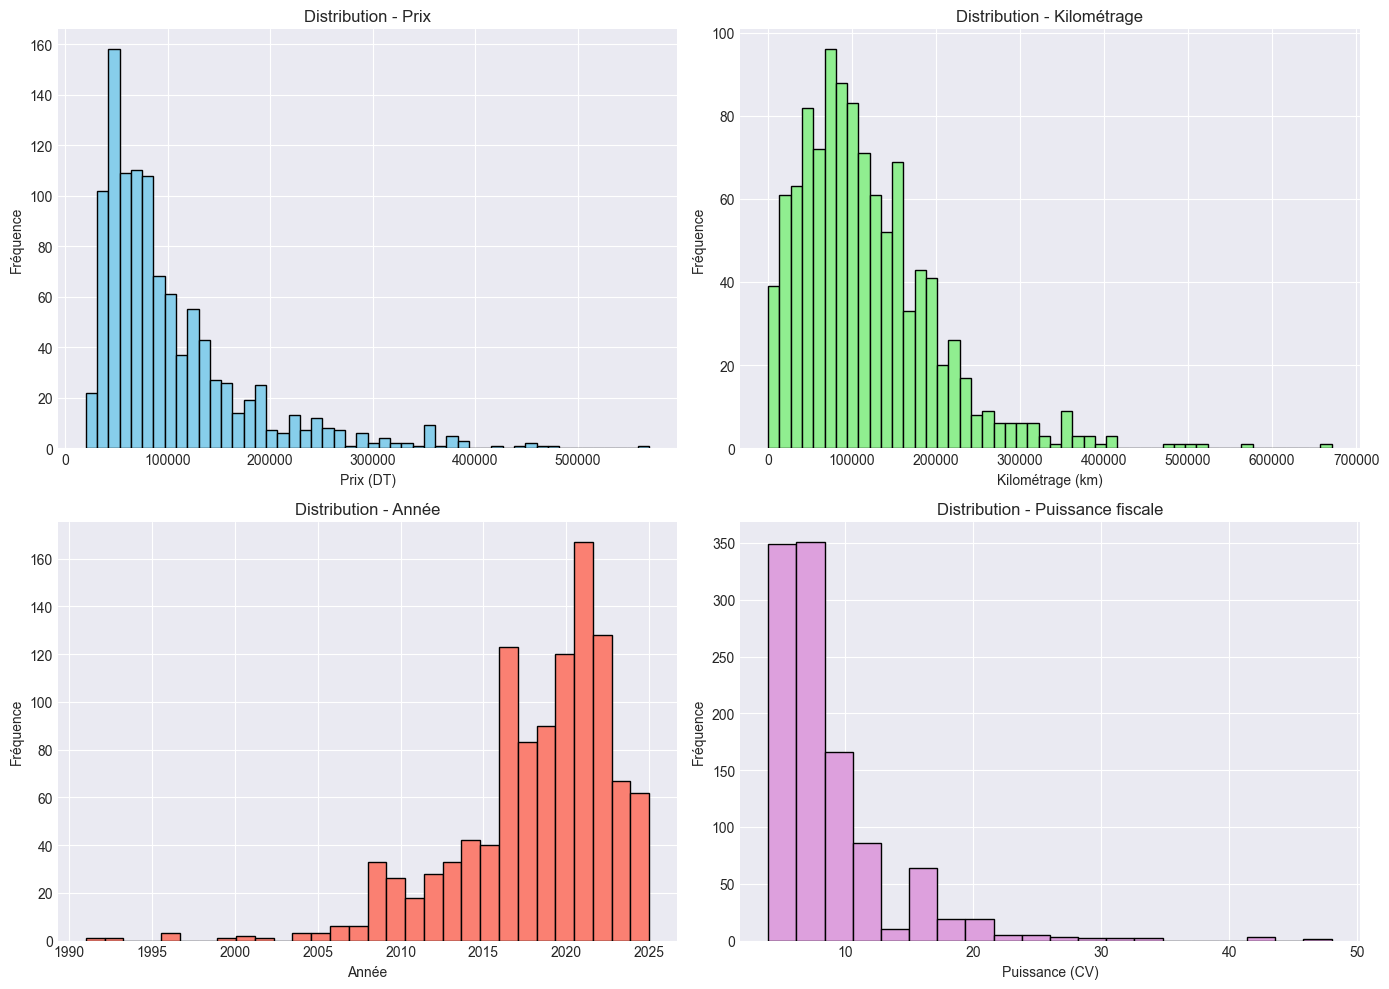

In [145]:
# Visualisation des distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Prix
df_clean['Prix_Numeric'].hist(bins=50, ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution - Prix')
axes[0, 0].set_xlabel('Prix (DT)')
axes[0, 0].set_ylabel('Fréquence')

# Kilométrage
df_clean['Kilométrage_Numeric'].hist(bins=50, ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution - Kilométrage')
axes[0, 1].set_xlabel('Kilométrage (km)')
axes[0, 1].set_ylabel('Fréquence')

# Année
df_clean['Année'].hist(bins=30, ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('Distribution - Année')
axes[1, 0].set_xlabel('Année')
axes[1, 0].set_ylabel('Fréquence')

# Puissance
df_clean['Puissance_Numeric'].hist(bins=20, ax=axes[1, 1], color='plum', edgecolor='black')
axes[1, 1].set_title('Distribution - Puissance fiscale')
axes[1, 1].set_xlabel('Puissance (CV)')
axes[1, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

## 14. Détection et traitement des outliers

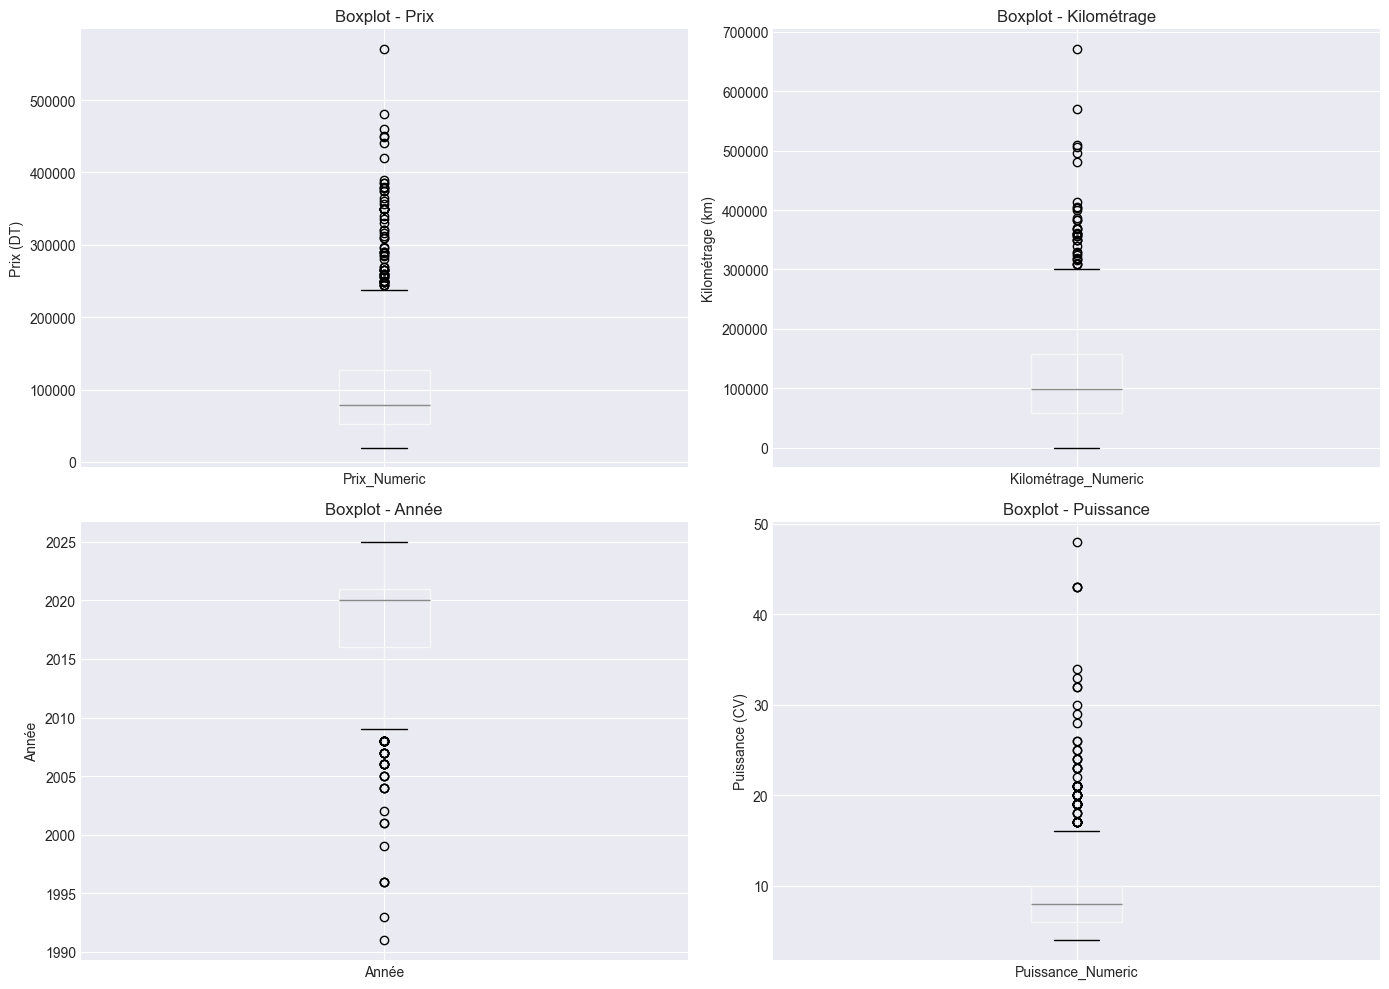

In [146]:
# Boxplots pour identifier les outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

df_clean.boxplot(column='Prix_Numeric', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot - Prix')
axes[0, 0].set_ylabel('Prix (DT)')

df_clean.boxplot(column='Kilométrage_Numeric', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot - Kilométrage')
axes[0, 1].set_ylabel('Kilométrage (km)')

df_clean.boxplot(column='Année', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot - Année')
axes[1, 0].set_ylabel('Année')

df_clean.boxplot(column='Puissance_Numeric', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot - Puissance')
axes[1, 1].set_ylabel('Puissance (CV)')

plt.tight_layout()
plt.show()

In [66]:
# Fonction pour détecter les outliers avec IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyser les outliers
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    print(f"\n{col}:")
    print(f"  Nombre d'outliers: {len(outliers)}")
    print(f"  Borne inférieure: {lower:.2f}")
    print(f"  Borne supérieure: {upper:.2f}")


Prix_Numeric:
  Nombre d'outliers: 70
  Borne inférieure: -60500.00
  Borne supérieure: 239500.00

Kilométrage_Numeric:
  Nombre d'outliers: 35
  Borne inférieure: -89500.00
  Borne supérieure: 306500.00

Année:
  Nombre d'outliers: 44
  Borne inférieure: 2008.50
  Borne supérieure: 2028.50

Puissance_Numeric:
  Nombre d'outliers: 71
  Borne inférieure: 0.00
  Borne supérieure: 16.00


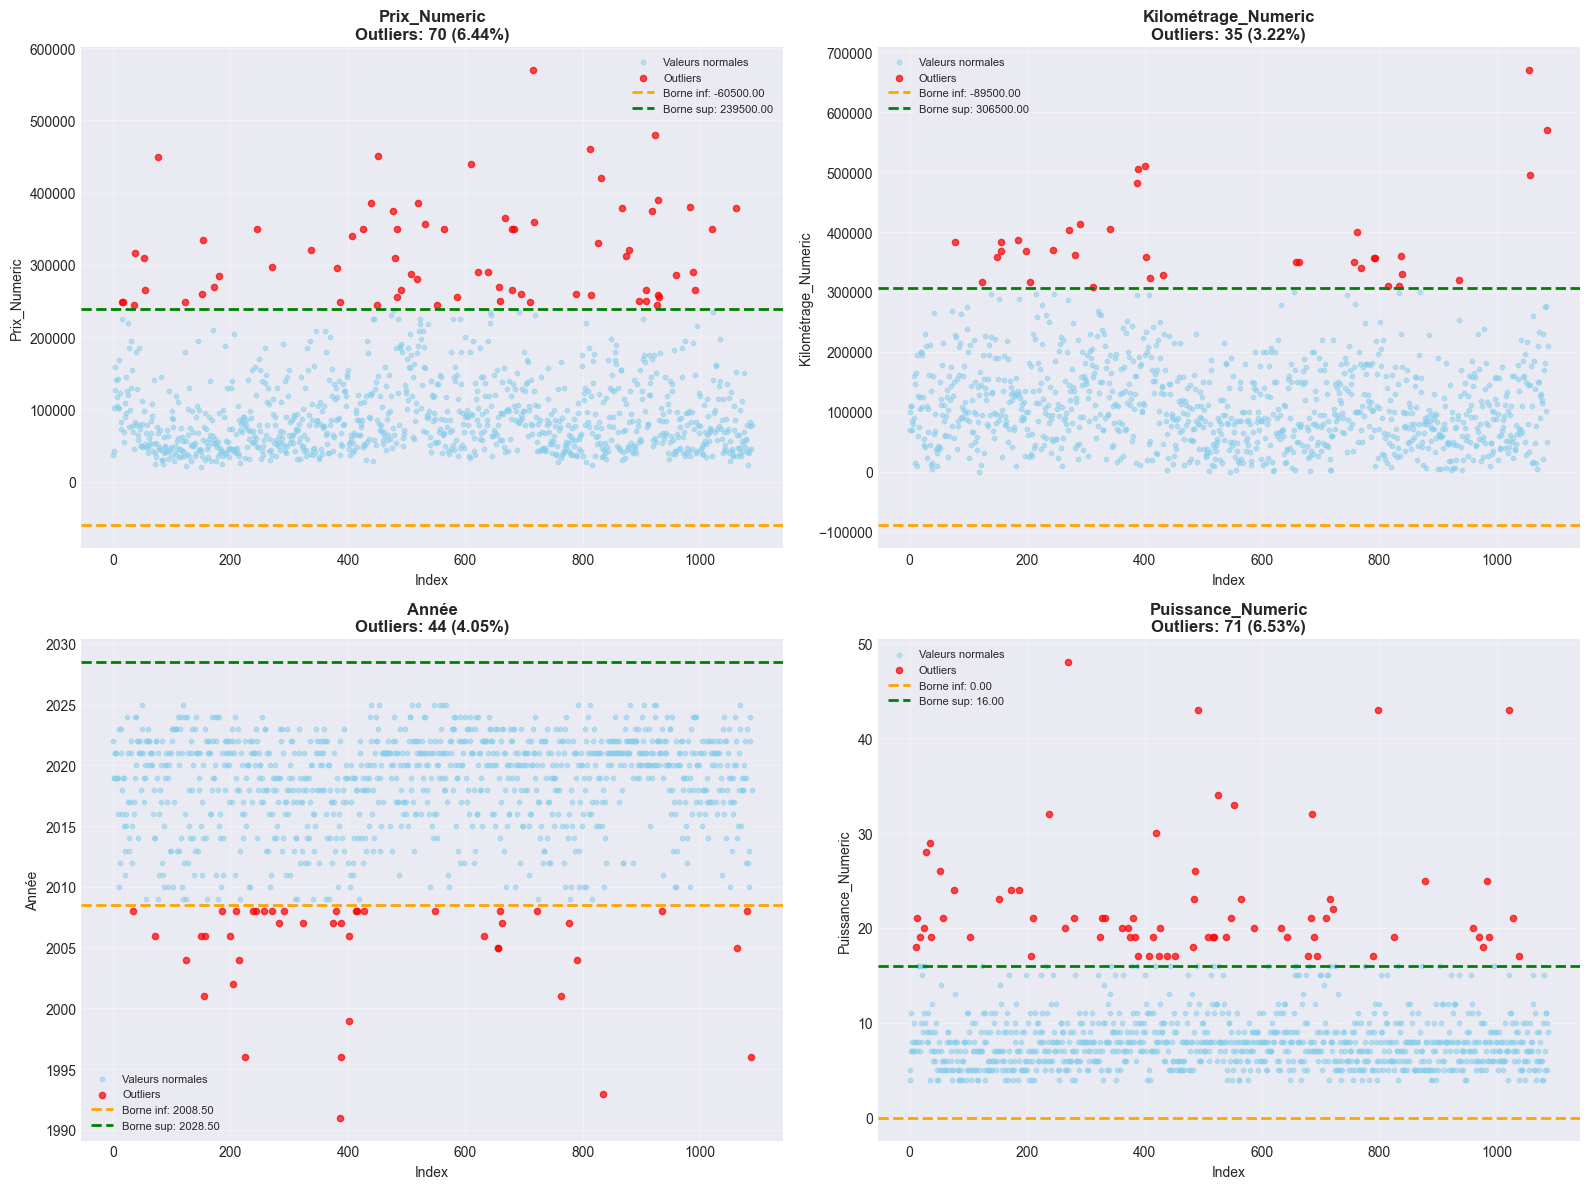


RÉSUMÉ DES OUTLIERS DÉTECTÉS (Méthode IQR)

Prix_Numeric:
  Nombre d'outliers: 70 (6.44%)
  Borne inférieure (IQR): -60500.00
  Borne supérieure (IQR): 239500.00
  Valeurs outliers - Min: 245000.00, Max: 570000.00

Kilométrage_Numeric:
  Nombre d'outliers: 35 (3.22%)
  Borne inférieure (IQR): -89500.00
  Borne supérieure (IQR): 306500.00
  Valeurs outliers - Min: 309000.00, Max: 670800.00

Année:
  Nombre d'outliers: 44 (4.05%)
  Borne inférieure (IQR): 2008.50
  Borne supérieure (IQR): 2028.50
  Valeurs outliers - Min: 1991.00, Max: 2008.00

Puissance_Numeric:
  Nombre d'outliers: 71 (6.53%)
  Borne inférieure (IQR): 0.00
  Borne supérieure (IQR): 16.00
  Valeurs outliers - Min: 17.00, Max: 48.00


In [147]:
# Visualisation détaillée des outliers pour chaque feature
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, col in enumerate(numeric_cols):
    row = idx // 2
    col_idx = idx % 2
    ax = axes[row, col_idx]
    
    # Calculer les statistiques
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifier les outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    normal_values = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    # Créer le graphique
    ax.scatter(normal_values.index, normal_values[col], alpha=0.5, s=10, label='Valeurs normales', color='skyblue')
    ax.scatter(outliers.index, outliers[col], alpha=0.7, s=20, label='Outliers', color='red')
    
    # Ajouter les lignes de seuil
    ax.axhline(y=lower_bound, color='orange', linestyle='--', linewidth=2, label=f'Borne inf: {lower_bound:.2f}')
    ax.axhline(y=upper_bound, color='green', linestyle='--', linewidth=2, label=f'Borne sup: {upper_bound:.2f}')
    
    # Ajouter le titre et les labels
    ax.set_title(f'{col}\nOutliers: {len(outliers)} ({len(outliers)/len(df_clean)*100:.2f}%)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Index')
    ax.set_ylabel(col)
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Afficher un résumé statistique des outliers
print("\n" + "="*80)
print("RÉSUMÉ DES OUTLIERS DÉTECTÉS (Méthode IQR)")
print("="*80)
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    
    print(f"\n{col}:")
    print(f"  Nombre d'outliers: {len(outliers)} ({len(outliers)/len(df_clean)*100:.2f}%)")
    print(f"  Borne inférieure (IQR): {lower_bound:.2f}")
    print(f"  Borne supérieure (IQR): {upper_bound:.2f}")
    if len(outliers) > 0:
        print(f"  Valeurs outliers - Min: {outliers[col].min():.2f}, Max: {outliers[col].max():.2f}")

In [148]:
df_clean.shape

(1087, 19)

## 15. Sélection et réorganisation des colonnes finales

## 14b. Calcul de l'âge du véhicule

In [149]:
# Fonction pour calculer l'âge du véhicule
def calculate_age(annee):
    """Calcule l'âge du véhicule"""
    if pd.isna(annee):
        return np.nan
    return datetime.now().year - annee

# Appliquer le calcul de l'âge
df_clean['Age_Vehicule'] = df_clean['Année'].apply(calculate_age)

print(f"✓ Âge du véhicule calculé")
print(f"\nStatistiques de l'âge des véhicules:")
print(df_clean['Age_Vehicule'].describe())
print(f"\nDistribution de l'âge:")
print(df_clean['Age_Vehicule'].value_counts().sort_index())

✓ Âge du véhicule calculé

Statistiques de l'âge des véhicules:
count    1087.000000
mean        6.803128
std         4.660467
min         0.000000
25%         4.000000
50%         5.000000
75%         9.000000
max        34.000000
Name: Age_Vehicule, dtype: float64

Distribution de l'âge:
Age_Vehicule
0.0      17
1.0      45
2.0      67
3.0     128
4.0     167
5.0     120
6.0      90
7.0      83
8.0      68
9.0      55
10.0     40
11.0     42
12.0     33
13.0     28
14.0     18
15.0     26
16.0     16
17.0     17
18.0      6
19.0      6
20.0      3
21.0      3
23.0      1
24.0      2
26.0      1
29.0      3
32.0      1
34.0      1
Name: count, dtype: int64


In [151]:
# Sélectionner les colonnes finales
final_columns = [
    'Prix_Numeric',
    'Marque',
    'Modèle',
    'Année',
    'Age_Vehicule',
    'Kilométrage_Numeric',
    'Énergie',
    'Boîte de vitesse',
    'Puissance_Numeric'
]

df_final = df_clean[final_columns].copy()

# Renommer les colonnes pour plus de clarté (ordre spécifique pour compatibilité)
df_final.columns = [
    'Prix',
    'Marque',
    'Modele',
    'Annee',
    'Age',
    'Kilometrage',
    'Energie',
    'Boite_Vitesses',
    'Puissance_Fiscale'
]

print("Dataset final:")
print(df_final.head())

Dataset final:
       Prix         Marque                                      Modele   Annee  Age  Kilometrage  Energie Boite_Vitesses  Puissance_Fiscale
0   37500.0        Peugeot                           Peugeot 208 Style  2022.0  3.0      69000.0  Essence       Manuelle                5.0
1   42500.0           Seat                        Seat Ibiza Populaire  2019.0  6.0     100000.0  Essence       Manuelle                4.0
2  102000.0  Mercedes-Benz                  Mercedes-Benz Classe A AMG  2019.0  6.0     110000.0  Essence    Automatique                7.0
3  159000.0           Land  Land Rover Range Rover Evoque Dynamic SE +  2021.0  4.0     110000.0  Hybride    Automatique               11.0
4  127000.0  Mercedes-Benz                       Mercedes-Benz CLA AMG  2021.0  4.0      85000.0  Essence    Automatique                7.0


In [152]:
# Statistiques finales
print("\n" + "="*60)
print("RÉSUMÉ FINAL")
print("="*60)
print(f"Nombre total de voitures: {len(df_final)}")
print(f"Nombre de colonnes: {len(df_final.columns)}")
print(f"\nNombre de marques uniques: {df_final['Marque'].nunique()}")
print(f"Nombre de types d'énergie: {df_final['Energie'].nunique()}")
print(f"Nombre de types de boîte: {df_final['Boite_Vitesses'].nunique()}")
print(f"\nPlage de prix: {df_final['Prix'].min():.0f} - {df_final['Prix'].max():.0f} DT")
print(f"Plage d'années: {df_final['Annee'].min():.0f} - {df_final['Annee'].max():.0f}")
print(f"Plage d'âge: {df_final['Age'].min():.0f} - {df_final['Age'].max():.0f} ans")
print(f"\nValeurs manquantes totales: {df_final.isna().sum().sum()}")


RÉSUMÉ FINAL
Nombre total de voitures: 1087
Nombre de colonnes: 9

Nombre de marques uniques: 53
Nombre de types d'énergie: 4
Nombre de types de boîte: 2

Plage de prix: 19900 - 570000 DT
Plage d'années: 1991 - 2025
Plage d'âge: 0 - 34 ans

Valeurs manquantes totales: 0


## 16. Sauvegarde du dataset nettoyé

In [153]:
# Créer le dossier de sortie
output_dir = '../Data/cleaned/'
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder le dataset nettoyé
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
csv_filename = os.path.join(output_dir, f'automobile_tn_occasion_cleaned_{timestamp}.csv')
excel_filename = os.path.join(output_dir, f'automobile_tn_occasion_cleaned_{timestamp}.xlsx')

df_final.to_csv(csv_filename, index=False, encoding='utf-8-sig')
print(f"✓ Données sauvegardées: {csv_filename}")

try:
    df_final.to_excel(excel_filename, index=False, engine='openpyxl')
    print(f"✓ Données sauvegardées: {excel_filename}")
except:
    print("⚠️ Excel non sauvegardé (openpyxl non installé)")

✓ Données sauvegardées: ../Data/cleaned/automobile_tn_occasion_cleaned_20251130_150807.csv
✓ Données sauvegardées: ../Data/cleaned/automobile_tn_occasion_cleaned_20251130_150807.xlsx
✓ Données sauvegardées: ../Data/cleaned/automobile_tn_occasion_cleaned_20251130_150807.xlsx


In [154]:
print("\n🎉 Nettoyage terminé avec succès!")


🎉 Nettoyage terminé avec succès!
